Data can be found here: https://www.kaggle.com/ehallmar/beers-breweries-and-beer-reviews

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [2]:
reviews = pd.read_csv('../data/raw/reviews.csv')

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073128 entries, 0 to 9073127
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   beer_id   int64  
 1   username  object 
 2   date      object 
 3   text      object 
 4   look      float64
 5   smell     float64
 6   taste     float64
 7   feel      float64
 8   overall   float64
 9   score     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 692.2+ MB


In [4]:
reviews.head(10)

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
5,125646,jneff33,2017-12-20,,4.50,4.75,5.00,5.00,5.00,4.91
6,125646,yummybeer,2017-12-19,,4.75,4.50,4.75,4.75,4.75,4.69
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
8,125646,wwoj,2017-12-16,,5.00,4.75,4.50,4.50,4.50,4.59
9,125646,Rubenjr,2017-12-14,,4.75,4.50,4.50,4.75,4.50,4.54


In [5]:
beers = pd.read_csv('../data/raw/beers.csv')

In [6]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358873 entries, 0 to 358872
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            358873 non-null  int64  
 1   name          358873 non-null  object 
 2   brewery_id    358873 non-null  int64  
 3   state         298147 non-null  object 
 4   country       358719 non-null  object 
 5   style         358872 non-null  object 
 6   availability  358873 non-null  object 
 7   abv           320076 non-null  float64
 8   notes         358827 non-null  object 
 9   retired       358873 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 27.4+ MB


In [7]:
beers.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


In [8]:
breweries = pd.read_csv('../data/raw/breweries.csv')
breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50347 entries, 0 to 50346
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       50347 non-null  int64 
 1   name     50347 non-null  object
 2   city     50289 non-null  object
 3   state    39076 non-null  object
 4   country  50341 non-null  object
 5   notes    50262 non-null  object
 6   types    50347 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [9]:
breweries.head()

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


In [10]:
# row in which value of 'Age' column is more than 30
has_text_review_mask = reviews.apply(lambda x: True if len(x['text'].strip()) > 0 else False , axis=1)

number_with_text_reviews = has_text_review_mask.sum()

print('Number of Rows in dataframe: ', len(reviews))
print('Number of Rows in dataframe with text reviews: ', number_with_text_reviews)
print('Percent of Rows in dataframe with text reviews: ', 100.0*number_with_text_reviews/len(reviews))


Number of Rows in dataframe:  9073128
Number of Rows in dataframe with text reviews:  2987991
Percent of Rows in dataframe with text reviews:  32.93231397154322


### Example Review

In [11]:
reviews.text.iloc[0]

"\xa0\xa0 750 ml bottle, 2016 vintage, bottle #304 of 360. Served in a DFH snifter, the beer pours dark brown/black with about an inch tan head that stuck around a little while. There's also a good amount of lacing. I like the aroma, the brew smells like dark fruit (raisin, plum), chocolate, roasted malt, and a bit of licorice. For the most part I think the taste is just like the aroma, but with some coffee flavor noticeable too. Mouthfeel/body is medium/full, it's creamy and coating with a moderate amount of carbonation. I think it's a good overall brew, worth picking up if you want a nice straight forward imperial stout. Here's hoping Four String brings this back in the future! $9.99 a bottle. \xa0"

## Number of reviews for each beer

In [12]:
reviews_per_beer = reviews.groupby('beer_id').count()

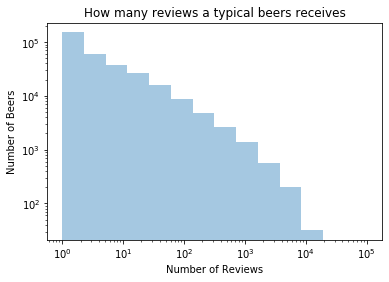

In [13]:
fig, ax = plt.subplots(1)

sns.distplot(reviews_per_beer.username.values, kde=False,
             bins=np.logspace(0,5,15),ax=ax)
#reviews.groupby('beer_id').count().username.hist(ax=ax,bins=(0,1,10,100,1000, 10000))
plt.xscale('log')
plt.xlabel('Number of Reviews')
plt.yscale('log')
plt.title('How many reviews a typical beers receives')
plt.ylabel('Number of Beers')
plt.show()

In [14]:
beer_reviews = beers.merge(reviews_per_beer.score, left_on='id', right_on='beer_id').rename(columns={'score':'n_reviews'})


In [15]:
beer_reviews.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,n_reviews
0,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f,99
1,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t,1
2,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f,1
3,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f,1
4,8036,World Burp Beer 2002,3469,NaN,JP,Japanese Rice Lager,Limited (brewed once),5.5,No notes at this time.,t,1


# Most rated beers

In [16]:
beer_reviews.sort_values('n_reviews', ascending=False).head(10)

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,n_reviews
137391,11757,Breakfast Stout,1199,MI,US,American Imperial Stout,Rotating,8.3,Availability: Sep - Dec,f,17160
96559,2093,90 Minute IPA,64,DE,US,American Imperial IPA,Year-round,9.0,"Esquire Magazine calls our 90 Minute IPA ""perh...",f,15947
123744,7971,Pliny The Elder,863,CA,US,American Imperial IPA,Rotating,8.0,No notes at this time.,f,14927
44381,1093,Two Hearted Ale,287,MI,US,American IPA,Year-round,7.0,Brewed with 100% Centennial hops from the Paci...,f,14915
127371,29619,Sculpin IPA,199,CA,US,American IPA,Year-round,7.0,Originally named Northstar IPA. Debuted in 2005.,f,14292
155042,16814,Heady Topper,46317,VT,US,New England IPA,Year-round,8.0,An American Double IPA. Drink from the can.,f,14282
40596,17112,Hopslam Ale,287,MI,US,American Imperial IPA,Winter,10.0,Starting with six different hop varietals adde...,f,13448
95343,19960,KBS (Kentucky Breakfast Stout),1199,MI,US,American Imperial Stout,Spring,12.3,This stout is brewed with a hint of coffee and...,f,13331
134375,10672,Bourbon County Brand Stout,1146,IL,US,American Imperial Stout,Winter,14.1,60 IBU,f,12706
22141,412,Old Rasputin,112,CA,US,Russian Imperial Stout,Year-round,9.0,Produced in the tradition of 18th Century Engl...,f,12529


# average of ratings by type of beer


In [17]:
beer_reviews.groupby('style').agg({'n_reviews':"mean",
                                 'id':'count'}).sort_values('n_reviews', ascending=False).rename(columns={'id':'n_beers'})

,n_reviews,n_beers
style,,
Belgian Gueuze,159.280851,235
American Imperial Red Ale,104.363636,341
American Imperial Porter,92.621818,550
New England IPA,69.641480,1919
Robust Porter,69.585106,188
...,...,...
Japanese Happoshu,5.982456,114
Russian Kvass,5.761111,180
English Pale Mild Ale,5.141153,503


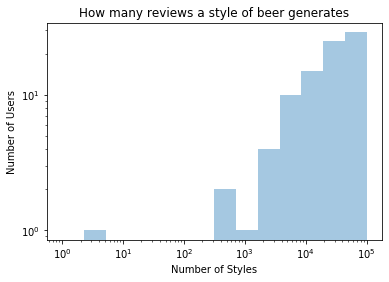

In [18]:
fig, ax = plt.subplots()

sns.distplot(beer_reviews.groupby('style').sum().n_reviews.values, kde=False,
             bins=np.logspace(0,5,15),ax=ax)
#reviews.groupby('beer_id').count().username.hist(ax=ax,bins=(0,1,10,100,1000, 10000))
plt.xscale('log')
plt.xlabel('Number of Styles')
plt.yscale('log')
plt.title('How many reviews a style of beer generates')
plt.ylabel('Number of Users')
plt.show()



## Number of reviews for each user

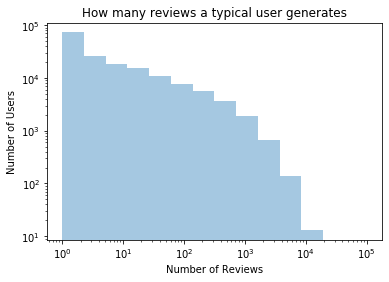

In [19]:
fig, ax = plt.subplots()

sns.distplot(reviews.groupby('username').count().text.values, kde=False,
             bins=np.logspace(0,5,15),ax=ax)
#reviews.groupby('beer_id').count().username.hist(ax=ax,bins=(0,1,10,100,1000, 10000))
plt.xscale('log')
plt.xlabel('Number of Reviews')
plt.yscale('log')
plt.title('How many reviews a typical user generates')
plt.ylabel('Number of Users')
plt.show()

## Correlations for beer reviews

In [20]:
average_reviews = reviews.dropna(axis=0).groupby('beer_id').mean()

In [21]:
# sns.pairplot(average_reviews)

In [22]:
# g = sns.PairGrid(average_reviews)
# g.map_diag(sns.kdeplot)
# g.map_offdiag(sns.kdeplot, n_levels=6);

In [23]:
average_reviews_user = reviews.dropna(axis=0).groupby('username').mean()

In [24]:
# sns.pairplot(average_reviews_user.drop('beer_id', axis=1))

In [25]:
# g = sns.PairGrid(average_reviews_user.drop('beer_id', axis=1))
# g.map_diag(sns.kdeplot)
# g.map_offdiag(sns.kdeplot, n_levels=6);

In [26]:
reviews.head(2)

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.0,4.0,4.0,4.25,4.0,4.03
1,125646,_dirty_,2017-12-21,,4.5,4.5,4.5,4.50,4.5,4.50


In [27]:
reviews_with_text = reviews[has_text_review_mask]
reviews_with_text.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31
7,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52
13,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53


In [28]:
beers.head(2)

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f


In [29]:
reviews_with_beer_info = reviews_with_text.merge(beers, left_on='beer_id', right_on='id')
reviews_with_beer_info.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,271781,Motorbreath Imperial Stout,28094,OH,US,American Imperial Stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t
1,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
2,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
3,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f
4,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53,125646,Haze,28743,MA,US,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f


In [30]:
all_text = " ".join(review for review in reviews_with_beer_info.text)

In [31]:
# wordcloud = WordCloud().generate(all_text)
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.savefig('../images/all_words_cloud.png')

In [32]:
!ls ../images/all_words_cloud.png

ls: ../images/all_words_cloud.png: No such file or directory


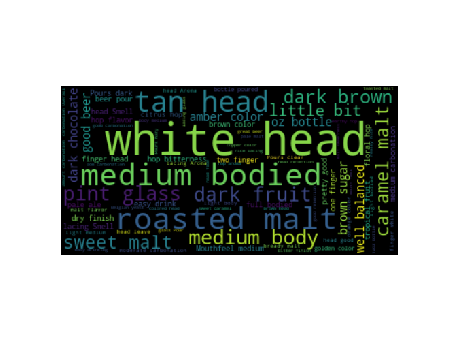

In [33]:
import matplotlib.image as mpimg
image = mpimg.imread("../reports/figures/all_words_cloud.png")
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.axis('off')
plt.show()

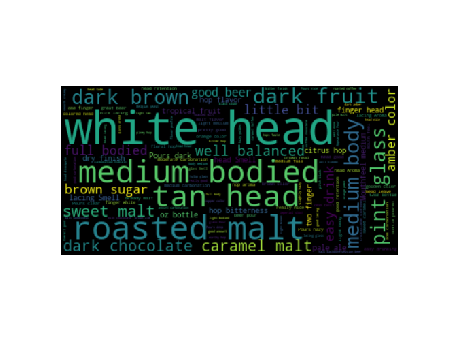

In [34]:
# good_text = ' '.join(review for review in reviews_with_beer_info[reviews_with_beer_info.overall >= 4.0].text)
# wordcloud = WordCloud().generate(good_text)
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.savefig('../images/good_words_cloud.png')

image = mpimg.imread("../reports/figures/good_words_cloud.png")
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.axis('off')
plt.show()

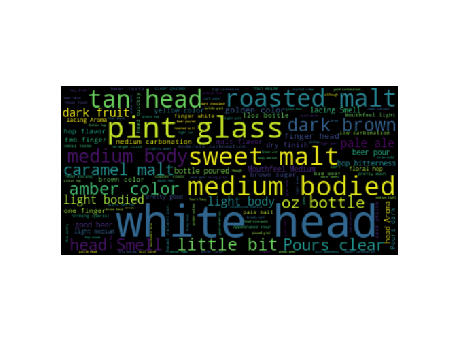

In [35]:
# bad_text = ' '.join(review for review in reviews_with_beer_info[reviews_with_beer_info.overall <= 3.0].text)
# wordcloud = WordCloud().generate(bad_text)
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.savefig('../images/bad_words_cloud.png')

image = mpimg.imread("../reports/figures/bad_words_cloud.png")
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.axis('off')
plt.show()

In [36]:
reviews_with_beer_info.describe()

,beer_id,look,smell,taste,feel,overall,score,id,brewery_id,abv
count,2.987923e+06,2.823750e+06,2.823750e+06,2.823750e+06,2.823750e+06,2.823750e+06,2.987923e+06,2.987923e+06,2.987923e+06,2.917525e+06
mean,6.329173e+04,3.899786e+00,3.812785e+00,3.852731e+00,3.816532e+00,3.860212e+00,3.842708e+00,6.329173e+04,8.012907e+03,7.207400e+00
std,7.676596e+04,5.892651e-01,6.628719e-01,6.958244e-01,6.529133e-01,6.707195e-01,6.061472e-01,7.676596e+04,1.217440e+04,2.400983e+00
min,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e-02
25%,5.059000e+03,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.550000e+00,5.059000e+03,1.730000e+02,5.400000e+00
50%,3.944100e+04,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.950000e+00,3.944100e+04,7.410000e+02,6.700000e+00
75%,8.382300e+04,4.250000e+00,4.250000e+00,4.500000e+00,4.250000e+00,4.250000e+00,4.240000e+00,8.382300e+04,1.406400e+04,8.500000e+00
max,3.731280e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,3.731280e+05,5.408000e+04,1.000000e+02


In [37]:
def getSentiment(x):
    if x < 3.0:
        return 'negative'
    elif x > 4.0:
        return 'positive'
    else:
        return 'neutral'

In [38]:
def roundSentiment(x):
    if x < 1.9:
        return 'one'
    elif x < 2.9:
        return 'two'
    elif x < 3.9:
        return 'three'
    elif x < 4.9:
        return 'four'
    else:
        return 'five'

In [39]:
reviews_with_beer_info['overall_sentiment'] = reviews_with_beer_info.overall.apply(roundSentiment)
reviews_with_beer_info['look_sentiment'] = reviews_with_beer_info.look.apply(roundSentiment)
reviews_with_beer_info['smell_sentiment'] = reviews_with_beer_info.smell.apply(roundSentiment)
reviews_with_beer_info['taste_sentiment'] = reviews_with_beer_info.taste.apply(roundSentiment)
reviews_with_beer_info['feel_sentiment'] = reviews_with_beer_info.feel.apply(roundSentiment)

In [40]:
reviews_with_beer_info.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score,...,style,availability,abv,notes,retired,overall_sentiment,look_sentiment,smell_sentiment,taste_sentiment,feel_sentiment
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03,...,American Imperial Stout,Limited (brewed once),10.8,2016 - Five Year Anniversary Imperial Stout,t,four,four,four,four,four
1,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58,...,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f,four,four,four,four,four
2,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31,...,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f,four,four,four,four,four
3,125646,MFMB,2017-12-16,Pours a creamy opaque light straw yellow wi...,4.75,4.50,4.50,4.50,4.50,4.52,...,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f,four,four,four,four,four
4,125646,jngrizzaffi,2017-12-10,Pours a cloudy yellow color with a thin foa...,4.50,4.50,4.50,4.75,4.50,4.53,...,New England IPA,Rotating,8.2,We constructed this beer around hops we curren...,f,four,four,four,four,four


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from nltk.corpus import stopwords

In [42]:
extra_words = ['beer', 'oz', 'ml', 'write', 'review']
all_stop_words = stopwords.words('english') + extra_words

In [43]:
sentiment_col = []
category_col = []
unigrams_col = []
bigrams_col = []
for category in ['overall_sentiment', 'look_sentiment', 'smell_sentiment', 'taste_sentiment', 'feel_sentiment']:
    print('category:' + category)
    X_train, X_subset, y_train, y_subset = train_test_split(reviews_with_beer_info['text'], 
                                                    reviews_with_beer_info[category], 
                                                    test_size=0.01, 
                                                    random_state=284)
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2), stop_words=all_stop_words)
    features = tfidf.fit_transform(X_subset).toarray()
    labels = y_subset
    features.shape
    N = 3
#     for sentiment in ['negative', 'neutral', 'positive']:
    for sentiment in ['one', 'two', 'three', 'four', 'five']:
        features_chi2 = chi2(features, labels == sentiment)
        indices = np.argsort(features_chi2[0])
        feature_names = np.array(tfidf.get_feature_names())[indices]
        unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
        bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
        print("# '{}':".format(sentiment))
        print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
        print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
        sentiment_col.append(sentiment)
        category_col.append(category.split('_')[0])
        unigrams_col.append('. '.join(unigrams[-N:]))
        bigrams_col.append('. '.join(bigrams[-N:]))
        


category:overall_sentiment
# 'one':
  . Most correlated unigrams:
. drain
. urine
. awful
  . Most correlated bigrams:
. drain pour
. worst ever
. avoid costs
# 'two':
  . Most correlated unigrams:
. adjunct
. watery
. corn
  . Most correlated bigrams:
. cherry coke
. thin watery
. poor example
# 'three':
  . Most correlated unigrams:
. ok
. bad
. average
  . Most correlated bigrams:
. one best
. overall decent
. nothing special
# 'four':
  . Most correlated unigrams:
. ok
. average
. bad
  . Most correlated bigrams:
. dark chocolate
. really nice
. nothing special
# 'five':
  . Most correlated unigrams:
. ever
. perfect
. amazing
  . Most correlated bigrams:
. best beers
. one best
. best ever
category:look_sentiment
# 'one':
  . Most correlated unigrams:
. bud
. water
. urine
  . Most correlated bigrams:
. really awful
. get drunk
. avoid costs
# 'two':
  . Most correlated unigrams:
. piss
. macro
. corn
  . Most correlated bigrams:
. smell corn
. taste bland
. bad aftertaste
# 'thre

In [44]:
sentiment_df = pd.DataFrame(list(zip(category_col, sentiment_col, unigrams_col, bigrams_col)), columns=['category', 'sentiment', 'unigrams', 'bigrams'])
sentiment_df.set_index(['category', 'sentiment'], inplace=True)
sentiment_df.head()


unigrams  \
category sentiment                           
overall  one           drain. urine. awful   
         two         adjunct. watery. corn   
         three            ok. bad. average   
         four             ok. average. bad   
         five       ever. perfect. amazing   

                                                         bigrams  
category sentiment                                                
overall  one                 drain pour. worst ever. avoid costs  
         two              cherry coke. thin watery. poor example  
         three         one best. overall decent. nothing special  
         four       dark chocolate. really nice. nothing special  
         five                    best beers. one best. best ever

In [45]:
sentiment_df.reset_index().pivot(index='category', columns='sentiment', values='unigrams')

sentiment,five,four,one,three,two
category,,,,,
feel,perfect. phenomenal. perfection,average. bad. watery,awful. urine. water,bad. decent. average,bland. corn. watery
look,beautiful. amazing. perfect,bad. average. corn,bud. water. urine,great. beautiful. average,piss. macro. corn
overall,ever. perfect. amazing,ok. average. bad,drain. urine. awful,ok. bad. average,adjunct. watery. corn
smell,perfect. phenomenal. amazing,average. bad. corn,urine. water. awful,bad. decent. average,macro. skunky. corn
taste,perfection. perfect. amazing,bland. corn. bad,urine. awful. worst,bad. average. decent,watery. bland. corn


In [46]:
sentiment_df.reset_index().pivot(index='category', columns='sentiment', values='bigrams')

sentiment,five,four,one,three,two
category,,,,,
feel,one best. hands favorite. best ever,full bodied. bit thin. bit watery,even drink. get drunk. avoid costs,bit thin. one best. bit watery,mouthfeel thin. taste bland. thin watery
look,lacking body. hands favorite. best ever,nothing special. tan head. bud light,really awful. get drunk. avoid costs,top small. light bodied. one best,smell corn. taste bland. bad aftertaste
overall,best beers. one best. best ever,dark chocolate. really nice. nothing special,drain pour. worst ever. avoid costs,one best. overall decent. nothing special,cherry coke. thin watery. poor example
smell,hands favorite. best smelling. best ever,dark fruits. dark chocolate. nothing special,really awful. get drunk. avoid costs,overall decent. one best. nothing special,coors light. macro lager. bud light
taste,best ever. one best. best beers,dark chocolate. really nice. nothing special,avoid costs. one worst. worst ever,one best. overall decent. nothing special,skunky taste. bad bottle. drain pour


In [47]:
# X_train, X_subset, y_train, y_subset = train_test_split(reviews_with_beer_info['text'], 
#                                                     reviews_with_beer_info['overall_sentiment'], 
#                                                     test_size=0.01, 
#                                                     random_state=284)

In [48]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
# features = tfidf.fit_transform(X_subset).toarray()
# labels = y_subset
# features.shape

In [49]:
# from sklearn.feature_selection import chi2
# N = 3
# for category in ['negative', 'neutral', 'positive']:
#   features_chi2 = chi2(features, labels == category)
#   indices = np.argsort(features_chi2[0])
#   feature_names = np.array(tfidf.get_feature_names())[indices]
#   unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#   bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#   print("# '{}':".format(category))
#   print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#   print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [50]:
import nltk

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bethanys08/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
txt = reviews_with_beer_info.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 



In [53]:
top_N = 30
print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

All frequencies, including STOPWORDS:
     Word  Frequency
0       .   26063900
1       ,   18628144
2       a   15800028
3     the   13838326
4     and   10547253
5      of    8367157
6      is    6432071
7    with    6264889
8      it    4961086
9       i    4849374
10     to    4739780
11   this    4321810
12     in    3496451
13    but    3375319
14   beer    3079937
15   that    2892937
16      :    2851484
17   head    2460079
18   very    2413371
19    not    2252989
20     on    2252691
21   some    2077796
22     as    2042661
23    for    1958255
24  taste    1811336
25   nice    1688936
26    was    1680829
27     's    1676123
28  light    1633210
29   good    1597586


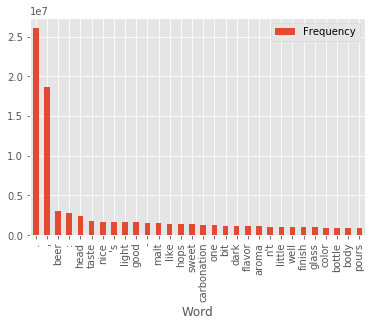

In [54]:
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=90)